#**Task 2 - Prediction using Superviesd ML**
## Name - Nitesh Mishra
-Predict the percentage of marks of an student based on the number of
study hours.






In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn


In [2]:
#importing our dataset from this link
data = pd.read_csv('http://bit.ly/w-data')

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


###**Visualizing and Analysing our data**






In [4]:
data.shape

(25, 2)

In [5]:
#Checking missing or null values are present or not
data.isna().sum()

Hours     0
Scores    0
dtype: int64

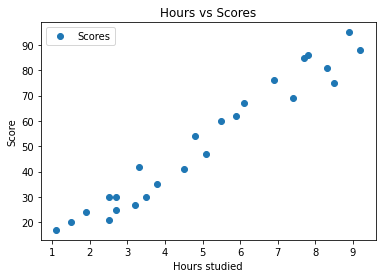

In [6]:
#Plotting our data to get clear understanding of our dataset and the relation among them.

data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Scores')
plt.xlabel('Hours studied')
plt.ylabel('Score')
plt.show()

By above graph we can clearly see that the score and hourse are strongly related to each other.
And both of them have a positive corelation among them

###**Building our linear regression model**

In [7]:
from sklearn import linear_model

In [8]:
#Separating our features as input and oytput features
x = data.iloc[:,:-1].values    #input feature
y = data.iloc[:,-1] .values    #output feature (Predictive variable)

In [9]:
#Splitting our data into train and test set

x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(x,y,test_size=0.1,random_state=0)

In [10]:
x_test

array([[1.5],
       [3.2],
       [7.4]])

In [11]:
model = linear_model.LinearRegression()    #creating our model using LinearRegression() 

In [12]:
model.fit(x_train,y_train)         #Training our model on train set data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

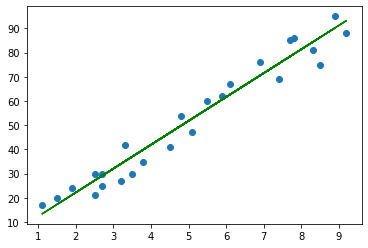

In [13]:
#Plotting our model i.e our hypothesis function

line = model.coef_*x + model.intercept_
plt.scatter(x,y)
plt.plot(x,line,color='green')
plt.show()

###**Testing our model**

In [14]:
#This shows how well it does on our training data
model.score(x_train,y_train)

0.9529891020405062

In [15]:
#Predicting the values on x_test data using our model
y_pred = model.predict(x_test)
y_pred

array([17.30220982, 34.05529402, 75.44526674])

In [16]:
#Checking both actucal and predicted value
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,20,17.302210
1,27,34.055294
2,69,75.445267


In [17]:
#Checking accuracy of our model on test data
model.score(x_test,y_test)

0.9298077534821835

Using MSE (Mean Squared Eroor) evaluation metric to get the proper understanding of our model

In [18]:
from sklearn import metrics

mse = metrics.mean_squared_error(y_test,y_pred)   #using MSE as evaluation metrics we can evan have RMSE,MAE,R2,etc.
print('Mean Squared error is {}'.format(mse))
mae = metrics.mean_absolute_error(y_test,y_pred)
print('Mean Absolute error is {}'.format(mae))

Mean Squared error is 32.865569647342106
Mean Absolute error is 5.3994503136120064


Making Prediction on our required task i.e
We want to predict the score of student if he study for 9.25 hrs/day

In [19]:
time = [9.25]
output = model.predict([time])
print('So percentage of marks student score if he studies for {} is {} '.format(time[0],output[0]))

So percentage of marks student score if he studies for 9.25 is 93.67656425238496 
